# Plots of F1 and SEMSCORE of responses vs target of sqauad datasets for extractive question answering using T5 and Roberta

In [25]:
#Preparing to import the files
import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/squad-f1-score/squad_F1_semscore_final.csv


In [26]:
#Importing the files and displaying the the top 5 entrys for getting how data is arranged 
import pandas as pd
import csv
df= pd.read_csv("/kaggle/input/squad-f1-score/squad_F1_semscore_final.csv")
print(df.shape)
df.head()

(34200, 14)


,Context,Question,Response,Response by T5,Response by Roberta,F1 T5 by method 1,F1 T5 by method 2,F1 Roberta by method 1,F1 Roberta by method 2,F1 Roberta-T5 by method 1,F1 Roberta-T5 by method 2,Semscore T5,Semscore Roberta,Semscore T5-Roberta
0,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...,What areas did Beyonce compete in when she was...,singing and dancing,singing and dancing,singing and dancing,1.000000,1.000000,1.000000,0.974359,1.000000,0.974359,1.000000,1.000000,1.000000
1,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...,When did Beyonce leave Destiny's Child and bec...,2003,Dangerously in Love (2003),2003,0.000000,0.266667,1.000000,1.000000,0.000000,0.266667,0.364046,1.000000,0.364046
2,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...,In what city and state did Beyonce grow up?,"Houston, Texas","Houston, Texas",Texas,1.000000,1.000000,0.666667,0.600000,0.666667,0.600000,1.000000,0.658517,0.658517
3,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...,In which decade did Beyonce become famous?,late 1990s,1990s,1990s,0.666667,0.666667,0.666667,0.750000,1.000000,0.909091,0.818032,0.818032,1.000000
4,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...,In what R&B group was she the lead singer?,Destiny's Child,Destiny's Child,Destiny's Child,1.000000,1.000000,1.000000,0.967742,1.000000,0.967742,1.000000,1.000000,1.000000


In [27]:
#initializing the variables for counting exact matches and lists of scores for bar graph plotting.
em_t5=0    #Exact match for model t5
zero_t5=0     #Absolute no match for model t5
em_roberta=0     #Exact match for model roberta
zero_roberta=0    #Absolute no match for model roberta
sem_t5=0        #counter forsemscore>0.9 for t5 model
sem_t5_data=[]   #list of point with semscore less that 0.9 for model t5
sem_roberta=0    #counter forsemscore>0.9 for roberta model
sem_roberta_data=[]     #list of point with semscore less that 0.9 for model roberta
sem_t5_roberta=0
sem_t5_roberta_data=[]

f1_t5_1=[]  #F1 score of model t5 with method 1
f1_t5_2=[]   #F1 score of model t5 with method 2
f1_roberta_1=[]  #F1 score of model roberta with method 1
f1_roberta_2=[]  #F1 score of model roberta with method 2

In [28]:
#Updating the variables initialized in last cell.

for i in range(5808):
    
    if df["F1 T5 by method 1"][i]==df["F1 T5 by method 2"][i]:  #An exact match is when the f1 score by both methods match and are non zero
        em_t5+=1
    else:
        if df["F1 T5 by method 1"][i]==0:  # a zero f1 is  when the f1 score by both methods match and are zero
            zero_t5+=1
        else:
            f1_t5_1.append(df["F1 T5 by method 1"][i])
        f1_t5_2.append(df["F1 T5 by method 2"][i])
        
    if df["F1 Roberta by method 1"][i]==df["F1 Roberta by method 2"][i]: #An exact match is when the f1 score by both methods match and are non zero
        em_roberta+=1
    else:
        if df["F1 Roberta by method 1"][i]==0: # azero f1 is  when the f1 score by both methods match and are zero
            zero_roberta+=1
        else:
            f1_t5_1.append(df["F1 Roberta by method 1"][i])
        f1_roberta_2.append(df["F1 Roberta by method 2"][i])
                            
    if (df["Semscore T5"][i]>0.9):
        sem_t5+=1
    else:
        sem_t5_data.append(df["Semscore T5"][i])
        
    if (df["Semscore Roberta"][i]>0.9):
        sem_roberta+=1
    else:
        sem_roberta_data.append(df["Semscore Roberta"][i])
        
    if (df["Semscore T5-Roberta"][i]>0.9):
        sem_t5_roberta+=1
    else:
        sem_t5_roberta_data.append(df["Semscore T5-Roberta"][i])
        
        
em_t5,em_roberta= df.loc[df['F1 T5 by method 1']==1]['F1 T5 by method 1'].count() , df.loc[df['F1 Roberta by method 1']==1]['F1 Roberta by method 1'].count()

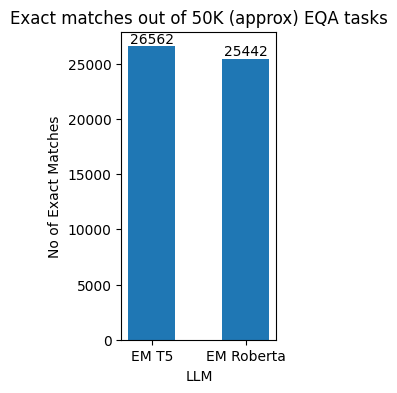

EM T5: 26562
EM Roberta: 25442


In [29]:
#Plotting exact matches for the squad datasets
import matplotlib.pyplot as plt

categories = ['EM T5', 'EM Roberta']
values = [em_t5, em_roberta]
plt.figure(figsize=(2, 4))  

# Plotting the bar graph
bars = plt.bar(categories, values, width=0.5)

# Adding labels and title
plt.xlabel('LLM')
plt.ylabel('No of Exact Matches')
plt.title('Exact matches out of 50K (approx) EQA tasks')

# Writing values on top of the bars
for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(value), ha='center', va='bottom')

# Showing the plot
plt.show()

print("EM T5:", em_t5)
print("EM Roberta:", em_roberta)

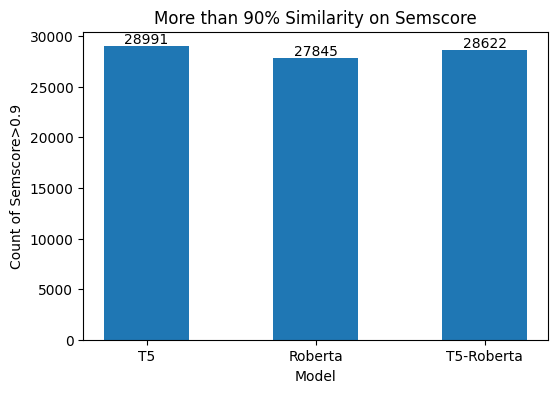

In [30]:

# Calculate values for the graph to plot for plotting datapoints with more than 90% cosine similiarity on semscore
sem_t5, sem_roberta, sem_t5_roberta = df.loc[df['Semscore T5'] > 0.9]['Semscore T5'].count(), df.loc[df['Semscore Roberta'] > 0.9]['Semscore Roberta'].count(), df.loc[df['Semscore T5-Roberta'] > 0.9]['Semscore T5-Roberta'].count()

categories = ['T5', 'Roberta', 'T5-Roberta']
values = [sem_t5, sem_roberta, sem_t5_roberta]
plt.figure(figsize=(6, 4))  # Adjust the figure size as needed

# Plotting the bar graph
bars = plt.bar(categories, values, width=0.5)

# Adding labels on bars
plt.bar_label(bars)

# Adding labels and title
plt.xlabel('Model')
plt.ylabel('Count of Semscore>0.9')
plt.title('More than 90% Similarity on Semscore')

# Showing the plot
plt.show()


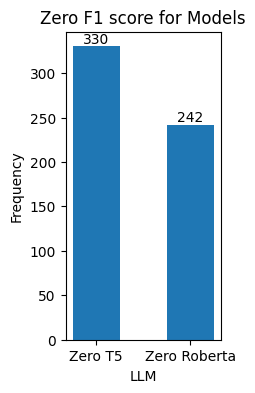

In [31]:
#bar plot of points with zero f1 score with the target response and 

categories = ['Zero T5', 'Zero Roberta']
values = [zero_t5, zero_roberta]
plt.figure(figsize=(2, 4)) 

# Plotting the bar graph
bars = plt.bar(categories, values, width=0.5)

# Adding labels and title
plt.xlabel('LLM')
plt.ylabel('Frequency')
plt.title('Zero F1 score for Models')

# Writing values on top of the bars
for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(value), ha='center', va='bottom')

# Showing the plot
plt.show()


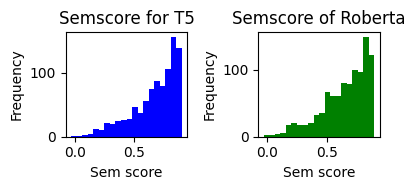

In [32]:
#Response with less than 90% cosine similiarity  on semscore

sem_t5_roberta_data
data1 = sem_t5_data
data2 = sem_roberta_data
data3 = sem_t5_roberta_data

# Creating subplots
fig, axs = plt.subplots(1, 2, figsize=(4, 2))  # 1 row, 3 columns

# Plotting histograms
axs[0].hist(data1, bins=20, color='blue')
axs[0].set_title('Semscore for T5')
axs[0].set_xlabel('Sem score')
axs[0].set_ylabel('Frequency')

axs[1].hist(data2, bins=20, color='green')
axs[1].set_title('Semscore of Roberta')
axs[1].set_xlabel('Sem score')
axs[1].set_ylabel('Frequency')

plt.tight_layout()

# Show plot
plt.show()

